In [2]:
import pandas as pd
import numpy as np
from scipy.sparse.linalg import svds
from scipy.sparse import csr_matrix , csc_matrix
# from sparse_table import SparseRealTable

from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib inline

#### TODO
1. construct user-rating matrix
2. make some sort of framework for testing this stuff.

# First, Load in all of the Data 

In [3]:
# columns for table with all of the movie meta-data
movie_meta_columns = [
    'adult', 'belongs_to_collection', 'budget', 'genres', 'homepage',
    'tmdb_id', 'imdb_id', 'original_language', 'original_title',
    'overview', 'popularity', 'poster_path', 'production_companies',
    'production_countries', 'release_date', 'revenue', 'runtime',
    'spoken_languages', 'status', 'tagline', 'title', 'video',
    'vote_average', 'vote_count'
]
movie_meta_dtypes =  [
    'bool', 'str', 'int', 'str', 'str', 'int', 'str', 'str', 'str',
    'str', 'float', 'str', 'str', 'str', 'str', 'int', 'float',
    'str', 'str', 'str', 'str', 'bool', 'float', 'int'
]

# read as pandas DataFrame
movies_meta = pd.read_csv(
        'movies_metadata.csv', header=None, skiprows=[0],
        names=movie_meta_columns,
        dtype=dict(zip(movie_meta_columns, movie_meta_dtypes))
    ).drop_duplicates(subset='tmdb_id')

# convert imdb_id "tt004679" to "004679"
movies_meta['imdb_id'] = movies_meta['imdb_id'].apply(
    lambda s: s[2:] if not pd.isna(s) else s)


# columns for the table with id correspondences
links_columns = ['movie_id', 'imdb_id', 'tmdb_id']
links_dtypes = ['str', 'str', 'str']
links = pd.read_csv(
    'links.csv', header=None, skiprows=[0],
    names=links_columns,
    dtype=dict(zip(links_columns, links_dtypes)))
links['index'] = np.arange(len(links))

# drop rows where tmdb_id == N/A 
links.dropna(subset=['tmdb_id'], inplace=True)
links.tmdb_id = links.tmdb_id.astype('int')

# columns for the table with user ratings
ratings_columns = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings_dtypes = ['int', 'int', 'float', 'int']
ratings = pd.read_csv(
    'ratings.csv', header=None, skiprows=[0],
     names=ratings_columns,
     dtype=dict(zip(ratings_columns, ratings_dtypes)))

FileNotFoundError: File b'movies_metadata.csv' does not exist

### Data Statistics / Attributes

In [8]:
print(f'Number of movies in the database: {len(links)}')

Number of movies in the database: 45624


In [9]:
print(f'Number of user ratings in the database: {len(ratings)}')

Number of user ratings in the database: 26024289


In [10]:
print(f'Number of users who have rated a movie: {len(set(ratings.user_id))}')

Number of users who have rated a movie: 270896


Distribution of user ratings:


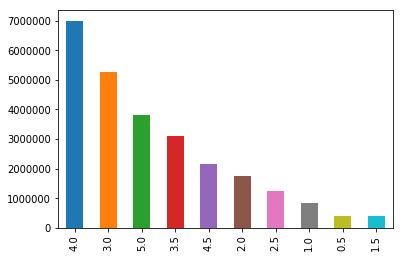

In [63]:
print('Distribution of user ratings:')
ratings.rating.value_counts().plot.bar();

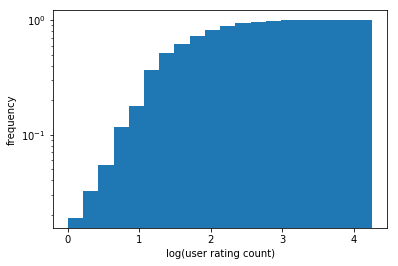

In [80]:
ratings_count = ratings.groupby('user_id').apply(lambda df: len(df))
plt.hist(np.log10(ratings_count.values), log=True, bins=20, normed=True, cumulative=True);
#plt.xticks(;
plt.xlabel('log(user rating count)');
plt.ylabel('frequency');

18276